In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [7]:
raw_data = pd.read_csv("transactions5.csv")

In [3]:
raw_data.head()

,block_height,txid,fee_sats,fee_per_vbyte,block_timestamp,time_to_confirm_seconds,vsize,value_btc
0,100000,8c14f0db3df150123e6f3dbbf30f8b955a8249b62ac1d1...,0,NaN,1293623863,NaN,0,50.000000
1,100000,fff2525b8931402dd09222c50775608f75787bd2b87e56...,0,NaN,1293623863,NaN,0,50.000000
2,100000,6359f0868171b1d194cbee1af2f16ea598ae8fad666d9b...,0,NaN,1293623863,NaN,0,3.000000
3,100000,e9a66845e05d5abc0ad04ec80f774a7e585c6e8db97596...,0,NaN,1293623863,NaN,0,0.010000
4,300000,b39fa6c39b99683ac8f456721b270786c627ecb2467008...,0,NaN,1399703554,NaN,0,25.040284


In [4]:
raw_data.tail()

,block_height,txid,fee_sats,fee_per_vbyte,block_timestamp,time_to_confirm_seconds,vsize,value_btc
6728,870000,36e6a2b0c8322aec5169d38f48977859a9830a40a78102...,292,NaN,1731419746,NaN,0,0.005406
6729,870000,7afc3091befb1742d2e77c5d3c2007cb19c468a811f574...,438,NaN,1731419746,NaN,0,0.004475
6730,870000,9b1ed81da20e2974d35745def43610526d7e2da48be625...,570,NaN,1731419746,NaN,0,0.003649
6731,870000,8ffdb1b7af3f49b3f7295d9fa5cc51e48aa9263bf8b00c...,339,NaN,1731419746,NaN,0,0.000185
6732,870000,baeed65ec1c3923daa72e1435ac70b5fc85b1a3feb858c...,927,NaN,1731419746,NaN,0,0.001054


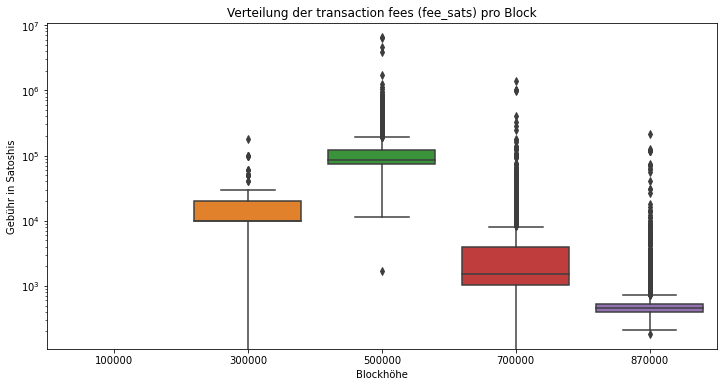

In [15]:
# Boxplot für fee_sats nach block_height
plt.figure(figsize=(12, 6))  # optional: Größe des Plots anpassen
sns.boxplot(x='block_height', y='fee_sats', data=raw_data)

plt.title("Verteilung der transaction fees (fee_sats) pro Block")
plt.xlabel("Blockhöhe")
plt.ylabel("Gebühr in Satoshis")

plt.yscale('log')  

plt.show()

In [9]:
# average fee berechnen:
stats_per_block = raw_data.groupby('block_height')['fee_sats'].agg(
    Durchschnitt='mean',
    Median='median',
    Günstigste='min',
    Teuerste='max'
)

print(stats_per_block)

               Durchschnitt   Median  Günstigste  Teuerste
block_height                                              
100000             0.000000      0.0           0         0
300000         16997.299578  10000.0           0    180000
500000        125639.253980  85897.0           0   6470750
700000         12060.062696   1512.0           0   1400000
870000          1329.728429    453.0           0    216480


In [36]:
#noch Anzahl Transaktionen allgemein
transactions_per_block = raw_data.groupby('block_height')['txid'].count()

# Ausgabe der Ergebnisse
print("Anzahl der Transaktionen pro Block:")
print(transactions_per_block)

Anzahl der Transaktionen pro Block:
block_height
100000       4
300000     237
500000    2701
700000    1276
870000    2515
Name: txid, dtype: int64


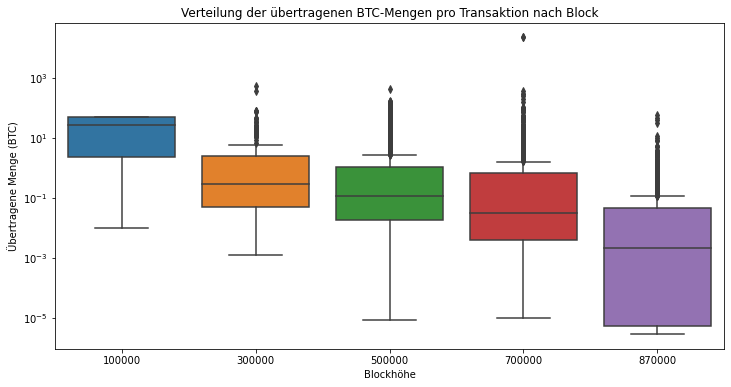

In [14]:
# korrelation zwischen fees und höhe der transaktionen:
plt.figure(figsize=(12, 6))
sns.boxplot(x='block_height', y='value_btc', data=raw_data)

plt.title("Verteilung der übertragenen BTC-Mengen pro Transaktion nach Block")
plt.xlabel("Blockhöhe")
plt.ylabel("Übertragene Menge (BTC)")
plt.yscale('log')

# Optional: Falls große Spannweite, logarithmische Skalierung anwenden
# plt.yscale('symlog')

plt.show()
#erwähnen dass log gescaled wurde!

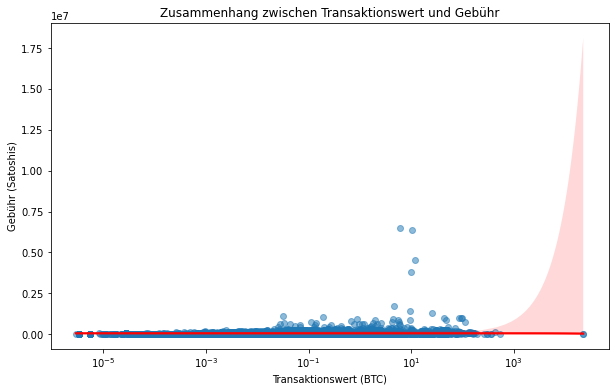

In [21]:
raw_data['value_btc'] = pd.to_numeric(raw_data['value_btc'], errors='coerce')
raw_data['fee_sats'] = pd.to_numeric(raw_data['fee_sats'], errors='coerce')

# Optional: Entferne Zeilen mit fehlenden Werten in den relevanten Spalten
df_clean = raw_data.dropna(subset=['value_btc', 'fee_sats'])

# Erstelle ein Scatterplot mit Regressionslinie
plt.figure(figsize=(10, 6))
sns.regplot(x='value_btc', y='fee_sats', data=df_clean,
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title("Zusammenhang zwischen Transaktionswert und Gebühr")
plt.xlabel("Transaktionswert (BTC)")
plt.ylabel("Gebühr (Satoshis)")

# Falls die Daten sehr stark streuen oder Ausreißer enthalten,
# können logarithmische Skalierungen helfen, Zusammenhänge besser darzustellen:
plt.xscale('log')
#plt.yscale('log')

plt.show()

In [22]:
correlation = df_clean['value_btc'].corr(df_clean['fee_sats'])
print("Korrelation zwischen Transaktionswert und Gebühr:", correlation)


Korrelation zwischen Transaktionswert und Gebühr: -0.002295825783904763


In [24]:
## kaum Korrelation! rote Korrelationskurve sehr flach


### Daten von mempool.space
statista anführen?
https://www.statista.com/statistics/793539/bitcoin-transaction-confirmation-time/

‎2024-11-12 14:55:20 
‎2024-11-12 14:55:46 --> 26 Sekunden 

‎2021-09-11 05:59:13
‎2021-09-11 06:14:32 --> 15 Minuten, 19 Sekunden

‎2017-12-18 19:34:47
‎2017-12-18 19:35:25 --> 38 Sekunden

‎2014-05-10 08:25:50 
‎2014-05-10 08:32:34 --> 6 Minuten, 44 Sekunden

‎2010-12-29 12:55:31
‎2010-12-29 12:57:43 --> 2 Minuten, 12 Sekunden

